## 필요한 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## example 데이터 불러오기

In [3]:
ex = pd.read_csv("example.csv")

In [4]:
ex

,번호,나이,키,몸무게,최종학력,연봉,다음기수
0,1,21,170,70,고등학교,3000,O
1,2,24,175,75,대학교,3200,X
2,3,23,180,80,고등학교,3400,X
3,4,22,185,85,대학교,2800,O
4,5,25,160,60,대학원,4000,O
5,6,23,155,55,대학교,3600,X
6,7,22,158,58,대학교,3800,O
7,8,26,166,66,고등학교,3700,O


## 데이터 프레임 정보 확인하기

In [5]:
ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
번호      8 non-null int64
나이      8 non-null int64
키       8 non-null int64
몸무게     8 non-null int64
최종학력    8 non-null object
연봉      8 non-null int64
다음기수    8 non-null object
dtypes: int64(5), object(2)
memory usage: 576.0+ bytes


# One Hot Encoding

## (1) pandas 모듈 사용

In [7]:
# get_dummies()
dummy = pd.get_dummies(ex['최종학력'])
dummy

,고등학교,대학교,대학원
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,0,0,1
5,0,1,0
6,0,1,0
7,1,0,0


In [9]:
# 최종 데이터 프레임 만들기
final = pd.concat([ex, dummy], axis=1)

# 필요없는 컬럼 지우기
final.drop(['최종학력'], axis=1, inplace=True)

# 최종 데이터 프레임 확인하기
final

,번호,나이,키,몸무게,연봉,다음기수,고등학교,대학교,대학원
0,1,21,170,70,3000,O,1,0,0
1,2,24,175,75,3200,X,0,1,0
2,3,23,180,80,3400,X,1,0,0
3,4,22,185,85,2800,O,0,1,0
4,5,25,160,60,4000,O,0,0,1
5,6,23,155,55,3600,X,0,1,0
6,7,22,158,58,3800,O,0,1,0
7,8,26,166,66,3700,O,1,0,0


In [18]:
# 한번에 처리
# pd.get_dummies(data, columns, drop_first)
## data : 데이터 프레임
## columns : one-hot encoding처리하고 싶은 column
## drop_first : True of False
pd.get_dummies(ex, columns=['최종학력'], drop_first=False)

,번호,나이,키,몸무게,연봉,다음기수,최종학력_고등학교,최종학력_대학교,최종학력_대학원
0,1,21,170,70,3000,O,1,0,0
1,2,24,175,75,3200,X,0,1,0
2,3,23,180,80,3400,X,1,0,0
3,4,22,185,85,2800,O,0,1,0
4,5,25,160,60,4000,O,0,0,1
5,6,23,155,55,3600,X,0,1,0
6,7,22,158,58,3800,O,0,1,0
7,8,26,166,66,3700,O,1,0,0


## (2) sklearn 모듈 사용

In [59]:
# 라이브러리 불러오기
from sklearn.preprocessing import OneHotEncoder

# numpy를 사용해 배열로 변경
arr = np.array(ex['최종학력'])

# OneHotEncoder를 넣기 위해 배열의 shape변경
arr = arr.reshape(-1, 1)

# OneHotEncoder 생성
onehot_encoder = OneHotEncoder() 

# OneHotEncoder 학습시키기
onehot_encoder.fit(arr)

# OneHotEncoder 적용시키기
temp = onehot_encoder.transform(arr).toarray()

temp

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

## Label Encoding 사용

In [71]:
# 라이브러리 불러오기
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 생성
label_encoder = LabelEncoder() 

# LabelEncoder 적용
temp2 = ex[['최종학력']].apply(label_encoder.fit_transform)
temp2

,최종학력
0,0
1,1
2,0
3,1
4,2
5,1
6,1
7,0


In [72]:
pd.concat([ex.drop(['최종학력'], axis=1), temp2], axis=1)

,번호,나이,키,몸무게,연봉,다음기수,최종학력
0,1,21,170,70,3000,O,0
1,2,24,175,75,3200,X,1
2,3,23,180,80,3400,X,0
3,4,22,185,85,2800,O,1
4,5,25,160,60,4000,O,2
5,6,23,155,55,3600,X,1
6,7,22,158,58,3800,O,1
7,8,26,166,66,3700,O,0


# K-NN

## 데이터 불러오기

In [86]:
wine = pd.read_csv("wine.csv")

In [88]:
wine

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## grade라는 column name으로 quality의 값이 3 ~ 6이면 Good / 7 ~ 9이면 Best로 할당

In [95]:
wine['grade'] = ['Good' if x in range(3,7) else 'Best' for x in wine['quality']]
wine

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,grade
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,Good
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,Good
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,Good
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,Good
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,Good
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,Good
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,Good
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,Best


## wine 요약통계량 확인

In [96]:
wine.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## 표준화

In [103]:
from sklearn.preprocessing import StandardScaler

# scaler 생성
standard_scaler = StandardScaler()

# scaler 학습
standard_scaler.fit(x_data)

# scaler 적용
wine_scaled = standard_scaler.transform(x_data)

# 최종 데이터프레임 만들기
x_data = pd.DataFrame(wine_scaled, columns=x_data.columns)
x_data

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
...,...,...,...,...,...,...,...,...,...,...,...
4893,-0.776015,-0.677101,-0.365197,-0.944765,-0.310008,-0.664970,-1.091000,-0.965483,0.541334,0.088973,0.557282
4894,-0.301959,0.414339,0.213280,0.317179,0.056196,1.275590,0.697499,0.291789,-0.253446,-0.261553,-0.743008
4895,-0.420473,-0.379435,-1.191592,-1.023637,-0.218457,-0.312141,-0.643875,-0.497350,-1.313153,-0.261553,-0.905544
4896,-1.605613,0.116674,-0.282557,-1.043355,-1.088192,-0.900190,-0.667408,-1.784717,1.004955,-0.962605,1.857572


## 종속변수, 독립변수 분할

In [151]:
x_data = wine.drop(['quality', 'grade'], axis=1)
y_data = wine['grade']

## train, test 분할

In [152]:
from sklearn.model_selection import train_test_split

X_train, y_train, X_test, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 321)

In [153]:
x_data.shape[0] * 0.8

3918.4

In [154]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3918, 11)
(980, 11)
(3918,)
(980,)


## K-NN 모델 적용

In [155]:
from sklearn.neighbors import KNeighborsClassifier

# knn 모델 생성
# n_neighbors : k의 개수
# p : 1(맨해튼), 2(유클리디안)
# weights : uniform(동일), distance(거리기반 가중치)
# n_jobs : -1을 사용하면 현재 컴퓨터내 모든 process 사용
classifier = KNeighborsClassifier(n_neighbors = 3)

In [ ]:
# knn 모델 학습
classifier.fit(X_train, X_test)

In [130]:
# 확률 출력
classifier.predict_proba(y_train)

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       ...,
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.66666667, 0.33333333]])

In [126]:
# 학습한 모델을 바탕으로 class 예측
y_pred = classifier.predict(y_train)
y_pred

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Best', 'Good', 'Good',
       'Best', 'Good', 'Good', 'Good', 'Best', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Best', 'Good', 'Good', 'Good', 'Good', 'Best',
       'Good', 'Best', 'Good', 'Good', 'Best', 'Best', 'Good', 'Best',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Best', 'Best', 'Best', 'Good', 'Good', 'Best', 'Good',
       'Good', 'Good', 'Good', 'Best', 'Good', 'Good', 'Good', 'Best',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Best', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Best', 'Good', 'Good',
       'Best', 'Best', 'Good', 'Good', 'Best', 'Best', 'Best', 'Good',
       'Best', 'Good', 'Best', 'Good', 'Good', 'Good', 'Best', 'Good',
       'Best', 'Best', 'Best', 'Good', 'Good', 'Best', 'Good', 'Good',
      

In [127]:
# 정확도 출력
sum(y_pred == y_test) / len(y_test)

0.8673469387755102

In [164]:
k_list = [x for x in range(1, 21)]
k = []
acc = []

for i in k_list:
    classifier = KNeighborsClassifier(n_neighbors = i, weights='distance')
    classifier.fit(X_train, X_test)    
    y_pred = classifier.predict(y_train)
    accuracy = sum(y_pred == y_test) / len(y_test)
    acc.append(accuracy)
    k.append(i)
    
final = pd.DataFrame({'k':k, 'accuracy':acc})
final

,k,accuracy
0,1,0.811224
1,2,0.811224
2,3,0.833673
3,4,0.834694
4,5,0.833673
5,6,0.844898
6,7,0.853061
7,8,0.852041
8,9,0.857143
9,10,0.862245


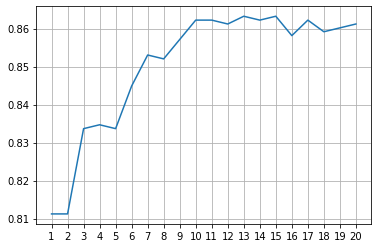

In [172]:
plt.plot(final.k, final.accuracy)
plt.xticks(final.k)
plt.grid(True)